# Modelleren van een rupsenuitbraak volgens de exponentiële groei

## Ongebonden exponentiële groei

Vele insecten willen zo veel mogelijk nakomelingen als mogelijk voorbrengen. In een generatie verpopt een buxusmotrups zich tot een buxusmot, welke nieuwe eitjes legt op een nieuwe haag. Uit deze eitjes kruipen nieuwe rupsen en de cyclus herbegint. Het leven van een insect is echter niet zonder gevaar. Op elk moment in de cyclus kunnen eitjes, rupsen, poppen en motten sterven door predatie van vogels, pesticiden, uithongering of andere gevaren. Als je echter gemiddeld kijkt, kan je aannemen dat elke rups aanleiding geeft tot een bepaald aantal nieuwe rupsen in de volgende generatie. Dit leidt tot de volgende regel:

$$u_t = a \cdot u_{t - 1}$$

waarbij $a > 0$ de groeifactor is. Dit is het recursieve voorschrift van een meetkundige rij, waarbij je op basis van een gegeven element uit de rij eenvoudig het volgende element kan bepalen door te vermenigvuldigen met $a$. In Python kan je dit recursieve voorschrift voorstellen als volgt:

In [1]:
def exponentiele_groei(u, a):
    '''
    Recursief voorschrift van de exponentiële groei
    
    Parameters
    ----------
    u: float
        de initiële populatiegrootte
    a: float
        de groeifactor
    
    Output
    ------
    float
        de nieuwe populatiegrootte
    '''
    
    return a * u

> **Note**
> Deze functie doet in principe niks anders dan $a$ vermenigvuldigen met $u$, wat kan aan de hand van de operator `*`.

De groeifactor $a$ stelt het gemiddeld aantal nakomelingen per rups voor. Je werkt met gemiddelden, dus kommagetallen zoals $0,2$ en $3,1$ zijn toegestaan, maar negatieve getallen houden geen steek. Denk even na over de gevolgen van de waarde van de groeifactor $a$:

- Als $a < 1$ brengt elke rups minder dan één rups voort per generatie. In elke tijdstap wordt de populatie kleiner en kleiner tot ze uiteindelijk uitsterft.

- Indien $a > 1$ zal elke rups aanleiding geven tot meer dan één nieuwe rups in de volgende generatie. De populatie zal groeien.

- In het randgeval waarbij $a = 1$ is de populatiegroote stabiel: de geboorte van nieuwe rupsen compenseert voor de sterfte.

Aangezien je hier plaaginsecten beschouwt, zal de groeifactor hoogstwaarschijnlijk groter dan 1 zijn. Experimenteer even met $a = 1{,}6$:

In [2]:
a = 1.6

Je moet nu enkel nog de waarde van een initiële $u_0$ bepalen, de populatiegrootte op $t = 0$. Begin met een bescheiden populatie van vijf rupsen:

In [3]:
u_0 = 5

Pas nu de functie toe:

In [4]:
u_1 = exponentiele_groei(u_0, a)
print(u_1)

8.0


> **Note**
> Stel vast dat een decimaal getal (een `float`) teruggegeven wordt: dit komt omdat ook de parameter $a$ een decimaal getal is.

Zoals verwacht zie je net geen verdubbeling van de populatie. Aangezien er voor elke rups in de huidige generatie gemiddeld 1,6 nieuwe rupsen aangemaakt worden, neemt het aantal rupsen tussen elke generatie met 60% toe. Deze laatste waarde wordt het **groeipercentage** genoemd, en wordt voorgesteld door de parameter $r$. Je vindt dan ook:

$$u_t = a \cdot u_{t - 1} = (1 + r) \cdot u_{t - 1}$$

Om nog een generatie verder te gaan, pas je de functie `exponentiele_groei` één keer toe op $u_1$, ofwel twee keer toe op $u_0$:

In [5]:
u_2 = exponentiele_groei(u_1, a)
print(u_2)

12.8


In [6]:
u_2 = exponentiele_groei(exponentiele_groei(u_0, a), a)
print(u_2)

12.8


Ga zo verder naar de derde en de vierde generatie:

In [7]:
u_3 = exponentiele_groei(u_2, a)
print(u_3)

20.480000000000004


In [8]:
u_4 = exponentiele_groei(u_3, a)
print(u_4)

32.76800000000001


Je ziet dat de populatie na vier generaties al meer dan zes keer zo groot geworden is.

Dit model laat toe om een expliciet voorschrift te bekomen voor de populatiegrootte doorheen de tijd:

$$u_t = u_0 \cdot a^t, t = 0, 1, 2, \ldots$$

Aangezien de variabele $t$ hier in de exponent staat, wordt dit groeimodel de exponentiële groei genoemd. De implementatie is relatief eenvoudig:

In [9]:
def exponentieel_model(t, u_0=5, a=1.6):
    '''
    Exponentieel model met expliciet voorschrift
    
    Parameters
    ----------
    t: int
        aantal generaties
    u: float
        de initiële populatiegrootte
    a: float
        de groeifactor
    
    Output
    ------
    float
        de nieuwe populatiegrootte
    '''
    
    return u_0 * a ** t

Hier wordt de groeifactor $a$ verheven tot de macht $t$ met behulp van de operator `**`. Stel vast dat dit model tot hetzelfde resultaat leidt als voordien:

In [10]:
# itereer over de waarden t = 0 tot en met t = 4
for t in range(5):
    
    # print het resultaat voor u_0 tot en met u_4
    print(f"u_{t} = {exponentieel_model(t):.3f}")

u_0 = 5.000
u_1 = 8.000
u_2 = 12.800
u_3 = 20.480
u_4 = 32.768


> **Note**
> Hierbij wordt gebruik gemaakt van `f-strings`, die toelaten om variabelen tussen accolades `{` en `}` te gebruiken. Verder zorgt de notatie `:.3f` ervoor dat er drie decimalen gebruikt worden bij het uitprinten.

### Opdracht 1

Experimenteer even met de aangeboden functie, door verschillende startwaarden $u_0$ en groeifactoren $a$ te gebruiken. Bereken zelf eerst de waarden $u_1$, $u_2$ en $u_3$, en vergelijk met het resultaat hier.

In [11]:
for t in range(5):
    print(f"u_{t} = {exponentieel_model(t, u_0=1):.3f}")

u_0 = 1.000
u_1 = 1.600
u_2 = 2.560
u_3 = 4.096
u_4 = 6.554


In [12]:
for t in range(5):
    print(f"u_{t} = {exponentieel_model(t, a=3):.3f}")

u_0 = 5.000
u_1 = 15.000
u_2 = 45.000
u_3 = 135.000
u_4 = 405.000


In [13]:
for t in range(5):
    print(f"u_{t} = {exponentieel_model(t, u_0=1, a=3):.3f}")

u_0 = 1.000
u_1 = 3.000
u_2 = 9.000
u_3 = 27.000
u_4 = 81.000


Je maakt nu een figuur waarin de populatiegrootte geplot wordt voor tien generaties door gebruik te maken van `Matplotlib` en `NumPy`. Dit kan aan de hand van een spreidingsdiagram, een grafiek waarin individuele punten getoond worden. Je genereert hierbij twee rijen: een rij `t_data` met elementen van het type `int`, en een rij `u_data` met elementen van het type `float`. Dit kan als volgt:

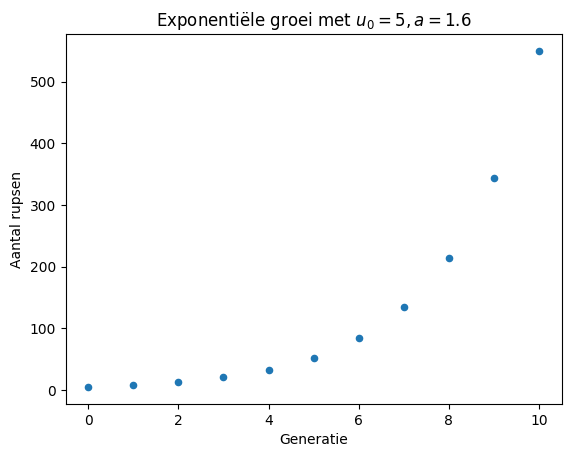

In [14]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt
import numpy as np

# initaliseer een rij met gehele getallen van 0 tot en met 10
data_t = np.arange(11)

# bereken de populatiegroottes voor alle waarden van t
data_u = exponentieel_model(data_t)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten met de scatter-functie
plt.scatter(data_t, data_u, 20)

# gebruik verduidelijkende labels
plt.xlabel("Generatie")
plt.ylabel("Aantal rupsen")

# voeg een titel toe
plt.title("Exponentiële groei met $u_0 = 5, a = 1.6$")

# toon de grafiek
plt.show()

### Opdracht 2

Print de waarden van `data_t` en `data_u` even uit. Stel vast dat de plaag erg snel groeit, wat verontrustend is!

In [15]:
print(data_t)
print(data_u)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  5.           8.          12.8         20.48        32.768
  52.4288      83.88608    134.217728   214.7483648  343.59738368
 549.75581389]


### Opdracht 3

Kijk nu eens verder in de tijd, door de populatiegrootte te plotten voor 70 generaties. Wat stel je vast?

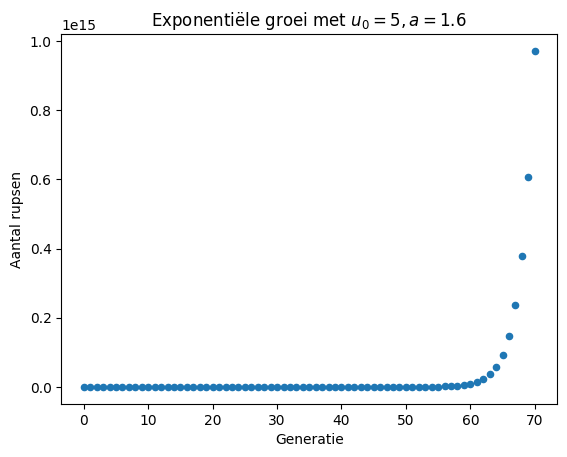

In [16]:
data_t = np.arange(71)
data_u = exponentieel_model(data_t)

plt.figure()
plt.scatter(data_t, data_u, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Exponentiële groei met $u_0 = 5, a = 1.6$')
plt.show()

Je stelt vast dat het aantal rupsen in de laatste iteraties heel sterk toeneemt!

### Opdracht 4

Hoeveel rupsen zijn er na 10 generaties? Hoeveel na 40? Hoeveel na 70?

In [17]:
for t in [10, 40, 70]:
    print(f'Aantal rupsen na {t} dagen: {data_u[t]:.0f}')

Aantal rupsen na 10 dagen: 550
Aantal rupsen na 40 dagen: 730750819
Aantal rupsen na 70 dagen: 971334446112868


Hierbij wordt een `for-lus` gebruikt, die het mogelijk maakt te itereren over de elementen in de lijst `[10, 40, 70]`.

### Opdracht 5

Neem aan dat elke rups ongeveer 3 gram weegt. Wat is dan hun totale gewicht in kilogram na 70 generaties? Denk je dat een doorsnee tuin over voldoende buxushagen beschikt om dergelijke populaties te ondersteunen?

In [18]:
print(data_u[70] * 0.003)

2914003338338.605


Je stelt vast dat de populatiegrootte zonder enige belemmering verder aangroeit. Na 70 generaties zijn er meer dan 970.000.000.000.000 rupsen. Als je aanneemt dat één rups ongeveer 3 gram weegt, zijn er na 70 generaties bijna 3 miljard ton aan rupsen, het equivalent van 2 miljard nijlpaarden. Er zijn bijlange niet genoeg buxushagen in de wereld om dergelijke populaties te ondersteunen!

### Opdracht 6

Hoelang duurt het tot er meer dan 1.000.000 rupsen zijn? Gebruik hiervoor een van de twee eerder gedefinieerde functies.

In [19]:
u = 5
t = 0
while u < 1000000:
    u = exponentiele_groei(u, 1.6)
    t += 1
print(f"Na {t} generaties is de populatiegrootte groter dan 1 miljoen")

Na 26 generaties is de populatiegrootte groter dan 1 miljoen


In de praktijk heeft elk ecosystem een bepaalde <em>draagkracht</em>, de hoeveelheid voedsel, water en ruimte die voorhanden is om een bepaalde populatie te ondersteunen. De draagkracht wordt vaak voorgesteld door de letter $K$. Als je aanneemt dat $K = 10000$, dan heeft onze tuin genoeg buxussen om 10.000 rupsen te voeden, maar niet meer. In het volgende hoofdstuk leer je hoe je het model kan uitbreiden om hier rekening mee te houden!

## De insecten voorbij

Groeimodellen vind je overal, niet enkel om de evolutie van insectenpopulaties te beschrijven, maar ook deze van kristallen, bacteriën, enzovoort. Een gekend voorbeeld van exponentiële groei vind je terug in de geneeskunde. Tijdens de **COVID-19 pandemie** werd exponentiële groei vaak in de mond genomen om het aantal besmette personen te beschrijven. De befaamde $R_0$-waarde waar epidemiologen het meer dan eens over hadden komt ruwweg overeen met de groeisnelheid $a$ die wij hier bestudeerden. Via sociale distancing, mondmaskers en vaccinatie werd er alles aan gedaan om deze onder een waarde van 1 te brengen.

### Opdracht 7

In het bestand `covid.csv` vind je het aantal besmettingen en het aantal dodelijke slachtoffers terug die COVID-19 veroorzaakt heeft in België gedurende de eerste weken van de pandemie. Dit bestand bevat vijf kolommen, die respectievelijk de dag, de maand, het jaar, het aantal besmettingen en het aantal dodelijke slachtoffers weergeeft. Lees dit CSV-bestand in met behulp van de `Pandas` module, en plot het aantal besmettingen doorheen de tijd. Meer informatie over het inlezen van CSV-bestanden vind je [hier](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) terug.

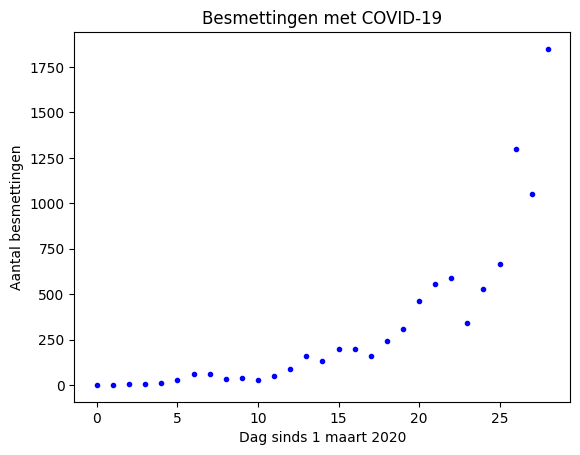

In [20]:
# importeer de nodige bibliotheken
import pandas as pd

# TODO: lees het CSV-bestand uit
corona = pd.read_csv("covid.csv")

# TODO: definieer de data die geplot moet worden
data_u = np.array(corona["gevallen"])
data_t = np.arange(len(data_u))

# TODO: maak een nieuwe grafiek aan
plt.figure()

# TODO: plot alle punten met de scatter-functie
plt.scatter(data_t, data_u, marker =".", color="blue")

# TODO: gebruik verduidelijkende labels
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal besmettingen")

# TODO: voeg een titel toe
plt.title("Besmettingen met COVID-19")

# TODO: toon de grafiek
plt.show()

### Opdracht 8

Doe nu hetzelfde voor het aantal dodelijke slachtoffers. Welke trend stel je vast?

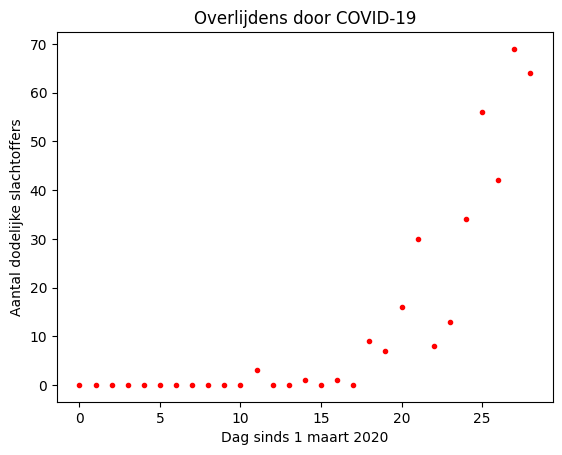

In [21]:
data_u = np.array(corona["doden"])
data_t = np.arange(len(data_u))

plt.figure()
plt.scatter(data_t, data_u, marker =".", color="red")
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal dodelijke slachtoffers")
plt.title("Overlijdens door COVID-19")
plt.show()

Als je de groeicurves bekijkt, zie je het gevaar van een exponentiële groei met $a > 1$: initieel neemt het aantal besmettingen gestaag toe, maar gaandeweg schiet dit aantal sneller en sneller de hoogte in. Daarom werd er ook zo significant ingegrepen, met onder meer een lockdown om verdere besmettingen te vermijden.

Wil je hier meer over weten? Via [deze link](https://www.dwengo.org/backend/api/learningObject/getWrapped?hruid=pn_expogroei&version=3&language=nl) kan je een interessante notepad bekijken, waarin onder meer het aantal besmettingen en het aantal ziekenhuisopnames in België weergegeven wordt als een functie van de tijd. Ook leer je hoe je de data kunt benaderen aan de hand van een exponentiële curve.

Een ander gekend voorbeeld van exponentiële groei is de zogenaamde **Wet van Moore**, die stelt dat het aantal transistoren in een computerchip elke twee jaar verdubbelt. Om dit te illustreren kan je gebruik maken van een **logaritmische schaal**, die het mogelijk maakt om een groot interval van waarden op een compacte manier voor te stellen.

Bij een traditionele **lineaire schaal** is de afstand tussen de getallen 1, 2, 3, 4, ... telkens even groot; het volstaat om het getal 1 op te tellen om eenzelfde afstand voort te bewegen langsheen de as. Bij een logaritmische schaal wordt een bepaalde afstand voortbewogen **wanneer een getal vermenigvuldigd wordt met een bepaalde constante**; de getallen 10, 100, 1000 en 10.000 liggen op die manier allemaal even ver van elkaar. Volgende grafieken illustreren dit concept:

In [22]:
def plot_lin_log(t_data, u_data):
    '''
    Functie die koppels (t, u_t)-waarden plot op een lineaire en een
    logaritmische schaal
    
    Parameters
    ----------
    data_t: list
        bevat alle waarden van t
    data_u: list
        bevat alle waarden van u_t
    '''
    
    # maak een nieuwe grafiek aan
    plt.figure(figsize=(12, 5))

    # plot de data met een lineaire y-as
    ax = plt.subplot(1, 2, 1)
    plt.scatter(data_t, data_u, marker =".", color="blue")
    plt.xlabel("t")
    plt.ylabel("$u_t$")
    plt.title("Lineaire y-as")
    ax.set_yscale("linear")

    # plot de data met een logaritmische y-as
    ax = plt.subplot(1, 2, 2)
    plt.scatter(data_t, data_u, marker =".", color="red")
    plt.xlabel("t")
    plt.ylabel("$u_t$")
    plt.title("Logaritmische y-as")
    ax.set_yscale("log")

    # toon de grafiek
    plt.show()

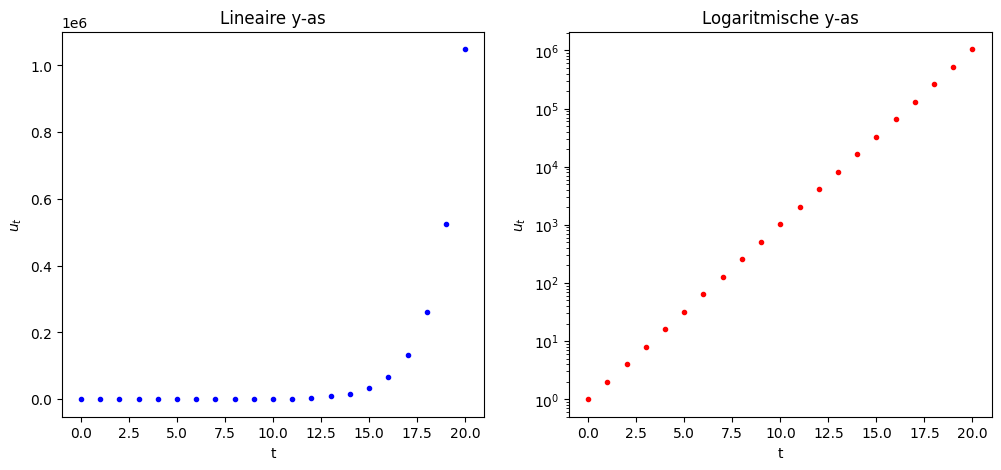

In [23]:
# definieer de data die geplot moet worden
data_t = np.arange(21)
data_u = exponentieel_model(data_t, u_0=1, a=2)

# plot de data
plot_lin_log(data_t, data_u)

In de linkse figuur wordt een lineaire as gebruikt, in de rechtse figuur een logaritmische as. Omdat bij opeenvolgende punten op de x-as de overeenkomstige waarde op de y-as vermenigvuldigd wordt met de constante $a = 2$, stel je vast dat het exponentieel model visueel resulteert in punten die op eenzelfde rechte liggen.

### Opdracht 9

Maak deze grafieken nu ook voor $a = 1.5$ en $a = 2.5$, en stel vast dat je een gelijkaardig resultaat bekomt. Let er wel op dat de waarden vermeld op de y-assen significant verschillend zijn!

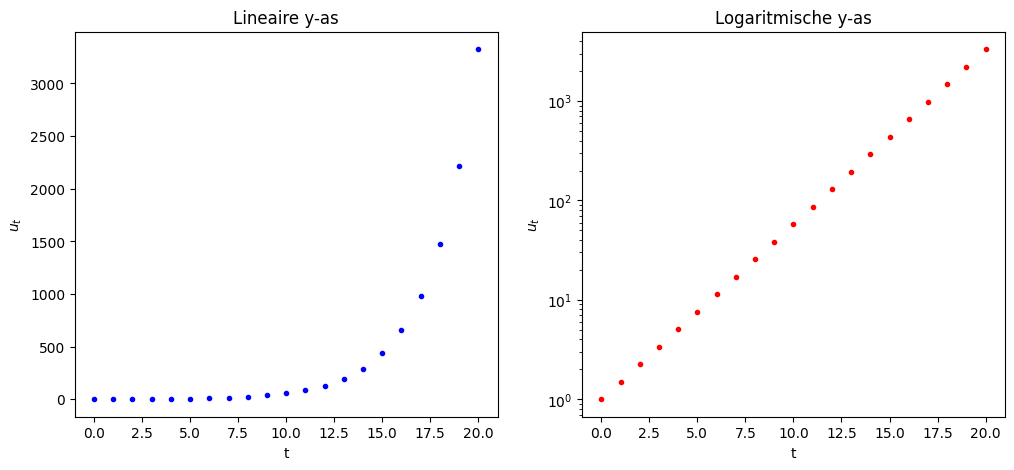

In [24]:
data_u = exponentieel_model(data_t, u_0=1, a=1.5)
plot_lin_log(data_t, data_u)

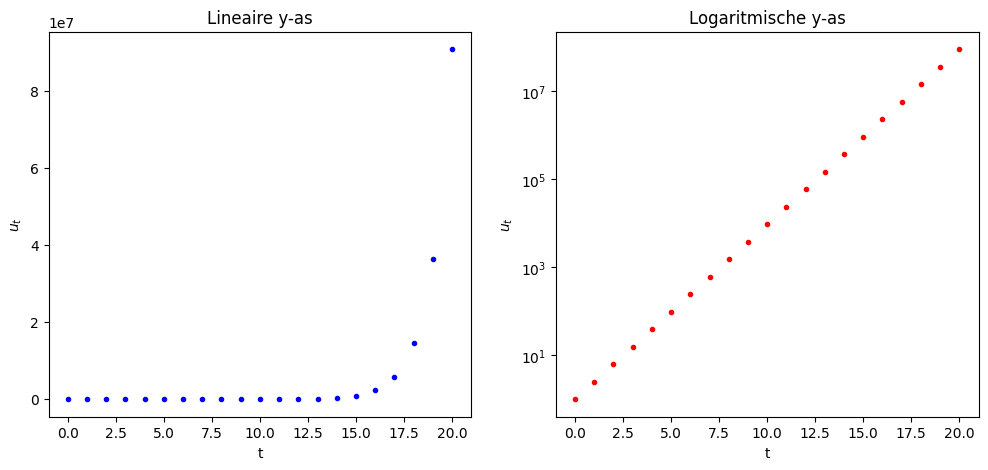

In [25]:
data_u = exponentieel_model(data_t, u_0=1, a=2.5)
plot_lin_log(data_t, data_u)